#The modelr API

Some small demos of the modelr API, hurriedly compiled. 

First, the usual preliminaries.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

##The old API

We used to have just one endpoint, `plot.jpeg`, which took parameters for the model itself (to build an earth), and for the seismic experiment (to produce a synthetic). These run against self-contained scripts. Here's an example call:

https://www.modelr.org/plot.jpeg?script=wedge_spatial.py&theta=0&f=25&colourmap=Greys&opacity=0.5&tslice=0.15&scale=1.0,99&type=scenario&base1=variable-density&Rock0=3000.0,1600.0,2500.0,50.0,50.0,50.0&Rock1=2770.0,1780.0,2185.0,50.0,50.0,50.0&Rock2=3000.0,1600.0,2500.0,50.0,50.0,50.0

 Let's build the request programmatically. We'll use the `requests` library, because it's nicer to use than `urllib2`. 

In [2]:
import requests

In [3]:
url = 'https://www.modelr.org/plot.jpeg'

# Parameters
params = {
           'script': 'wedge_spatial.py',
           'theta': 0,
           'f': 25,
           'colourmap': 'Greys',
           'opacity': 0.5,
           'tslice': 0.15,
           'scale': '1.0,99',
           'base1': 'variable-density',
           'Rock0': '3000.0,1600.0,2500.0,50.0,50.0,50.0',
           'Rock1': '2770.0,1780.0,2185.0,50.0,50.0,50.0',
           'Rock2': '3000.0,1600.0,2500.0,50.0,50.0,50.0',
           'type': "scenario"
         }

In [4]:
r = requests.get(url, params=params)

In [5]:
r.content[:200]

b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x02X\x00\x00\x04\xb0\x08\x06\x00\x00\x00\'\xa14\t\x00\x00\x00\x04sBIT\x08\x08\x08\x08|\x08d\x88\x00\x00\x00\tpHYs\x00\x00\x0fa\x00\x00\x0fa\x01\xa8?\xa7i\x00\x00 \x00IDATx\x9c\xec\x9dy\x98\\E\xbd\xfe\xdf\xd3{\xf7\xccd\xcfd!\x0ba\t7a\xb9\xe4\x1a! \x98\x85-\xb8E\x04Q\x16C\x84{U\x10\x90\xed\x87+7\x11\x03^\xae[\x88\x82W\xd4\xb0\x83(A\x14\xd9"J\x90\x9dH\x0c\x02\xb2$&lJ\x02\xc1@2kO\x9f\xae\xdf\x1f\x9d\xeat\xf7t\x9f\xf3\xad\xe9\xeau\xde\xcf\xf3\xe4\x99LwM\x9d\xaa\xd3\xa7\xeb\xbc\xe7\xbb\x95\xa3\x94R \x84\x10B\x08!\xd6'

In [11]:
from PIL import Image
from base64 import decodestring
from io import BytesIO

In [13]:
i = Image.open(BytesIO(r.content))

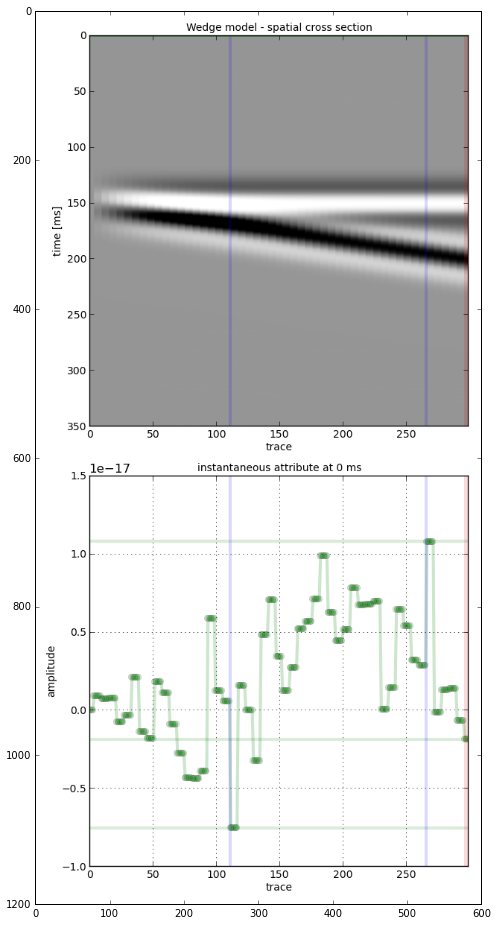

In [14]:
plt.figure(figsize=(8,18))
plt.imshow(i)
plt.show()

##The new API

Now we are working on splitting up the functions of modelr, to make it easier to combine different parts of the workflow. So there are separate endpoints for model building and forward modeling. 

###Model building

The model-building URL is displayed in modelr, on the page https://www.modelr.io/model_builder (subscription only).

Here's an example of a URL call againt the model-building endpoint:

https://www.modelr.org/plot.json?script=slab_builder.py&interface_depth=80&x_samples=350&margin=50&left=0%2C40&right=30%2C130&layers=3&type=model_builder

This URL returns a JSON containing only a base64-encoded PNG — the model of the earth.

Let's look at some actual code.

In [15]:
url = 'https://www.modelr.org/plot.json'

# Parameters
params = {
           'script': 'slab_builder.py',
           'interface_depth': 80,
           'x_samples': 350,
           'margin': 50,
           'left': '0,40',
           'right': '30,130',
           'layers': 3,
           'type': "model_builder"
         }

In [16]:
r = requests.get(url, params=params)

In [17]:
r.status_code

200

In [40]:
s = r.json()['data'].encode('utf-8')

import base64
b = base64.decodestring(s)

In [41]:
i = Image.open(BytesIO(b))

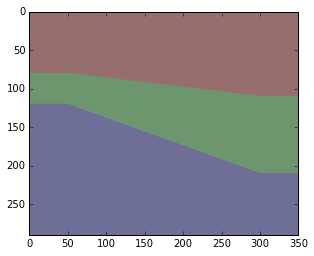

In [42]:
plt.imshow(i)
plt.show()

##Forward model

Now let's try to model this.

In [44]:
time   = range(0,99)
traces = range(1,350)
freqs  = range(10,100)

data = r.json()['data']

url_fm = 'https://www.modelr.org/forward_model.json'

In [45]:
p = {
      'data': data,
      'metadata':{'time': time,
      'trace': traces,
      'f': freqs}
    }

Actually... I don't think there's an easy way to do this right now.

We really need to be able to do the following:

- Make a 2D or 3D wedge model
- Send that model back with some seismic parameters and get a synthetic back
- Get the synthetic, or part of it, as a SEG-Y
